In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data_old = pd.read_csv('data/salary.csv')
data = pd.read_csv('data/filtered_data.csv')

In [4]:
data.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,SE,FT,Data Engineer,130500,0,M
1,SE,FT,Data Engineer,96000,0,M
2,SE,FT,Machine Learning Engineer,190000,0,M
3,SE,FT,Machine Learning Engineer,160000,0,M
4,EN,FT,Data Analyst,101520,0,M


In [5]:
def filter_job_titles(dataframe):
    #  Calculate percentage of each job_title
    job_title_counts = dataframe['job_title'].value_counts(normalize=True) * 100

    # Display job_title percentages
    print("Job Title Percentages:")
    print(job_title_counts)

    #  Identify job_title values with <= 10% percentage
    job_titles_to_keep = job_title_counts[job_title_counts > 10].index

    #  Filter DataFrame to keep only rows with job_titles in job_titles_to_keep
    filtered_df = dataframe[dataframe['job_title'].isin(job_titles_to_keep)]
    print("\nJob titles to keep:")
    print(job_titles_to_keep)
    return filtered_df


df_filtered = filter_job_titles(data_old)

Job Title Percentages:
job_title
Data Engineer                20.950768
Data Scientist               20.043547
Data Analyst                 14.757469
Machine Learning Engineer    10.312084
Research Scientist            3.211564
                               ...    
BI Data Engineer              0.006048
Marketing Data Engineer       0.006048
Data Science Tech Lead        0.006048
Principal Data Architect      0.006048
Cloud Data Architect          0.006048
Name: proportion, Length: 155, dtype: float64

Job titles to keep:
Index(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer'],
      dtype='object', name='job_title')


In [6]:
# Define input and output file paths
output_file = 'data/filtered_data.csv'


def save_to_file(dataframe):
    # Save filtered DataFrame to output file
    dataframe.to_csv(output_file, index=False)
    print(f"\nFiltered data saved to {output_file}")


save_to_file(df_filtered)


Filtered data saved to data/filtered_data.csv


In [7]:
def delete_columns(dataframe):
    # Identify columns to delete based on the considerations above
    columns_to_delete = ['work_year', 'salary_currency', 'salary', 'employee_residence', 'company_location']

    # Drop the identified columns from the DataFrame
    dataframe = dataframe.drop(columns=columns_to_delete)

    return dataframe


# Apply the function to delete columns
df_cleaned = delete_columns(df_filtered)
save_to_file(df_cleaned)


Filtered data saved to data/filtered_data.csv


In [8]:
data.shape

(10923, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  10923 non-null  object
 1   employment_type   10923 non-null  object
 2   job_title         10923 non-null  object
 3   salary_in_usd     10923 non-null  int64 
 4   remote_ratio      10923 non-null  int64 
 5   company_size      10923 non-null  object
dtypes: int64(2), object(4)
memory usage: 512.1+ KB


In [10]:
data.describe()

,salary_in_usd,remote_ratio
count,10923.000000,10923.000000
mean,146786.129085,32.930514
std,63307.349328,46.714911
min,15000.000000,0.000000
25%,100650.000000,0.000000
50%,140000.000000,0.000000
75%,183912.000000,100.000000
max,774000.000000,100.000000


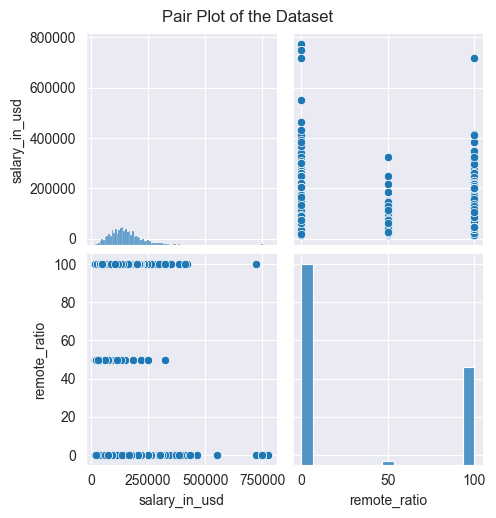

In [11]:
sns.pairplot(data)
plt.suptitle('Pair Plot of the Dataset', y=1.02)
plt.show()

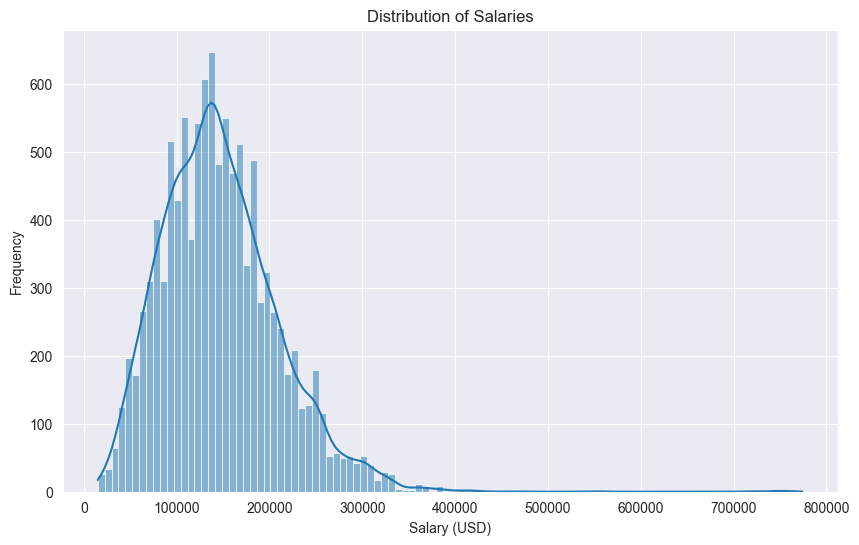

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

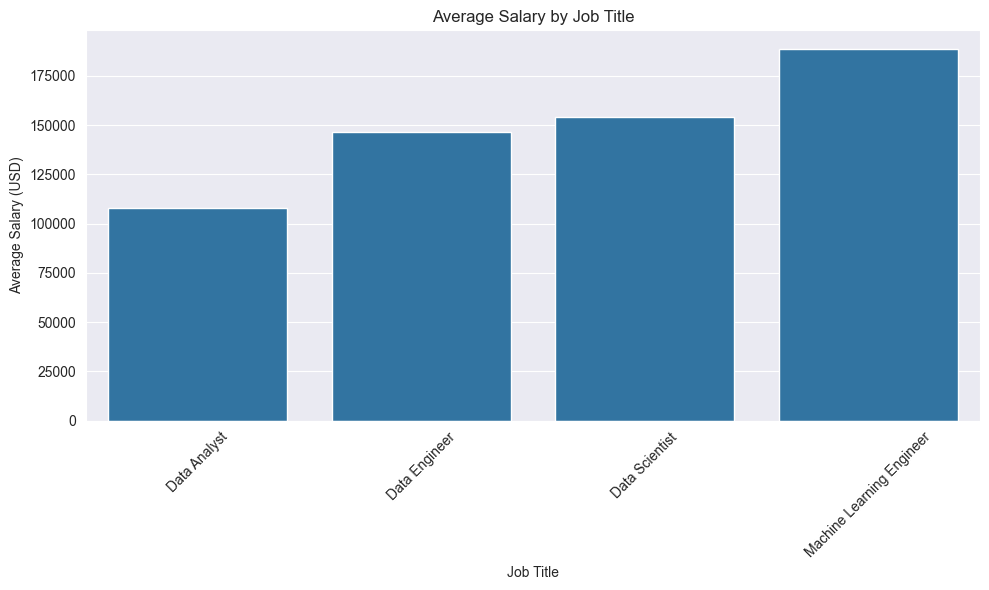

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average salary by job title
average_salary = data.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=average_salary)
plt.xticks(rotation=45)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.tight_layout()
plt.show()

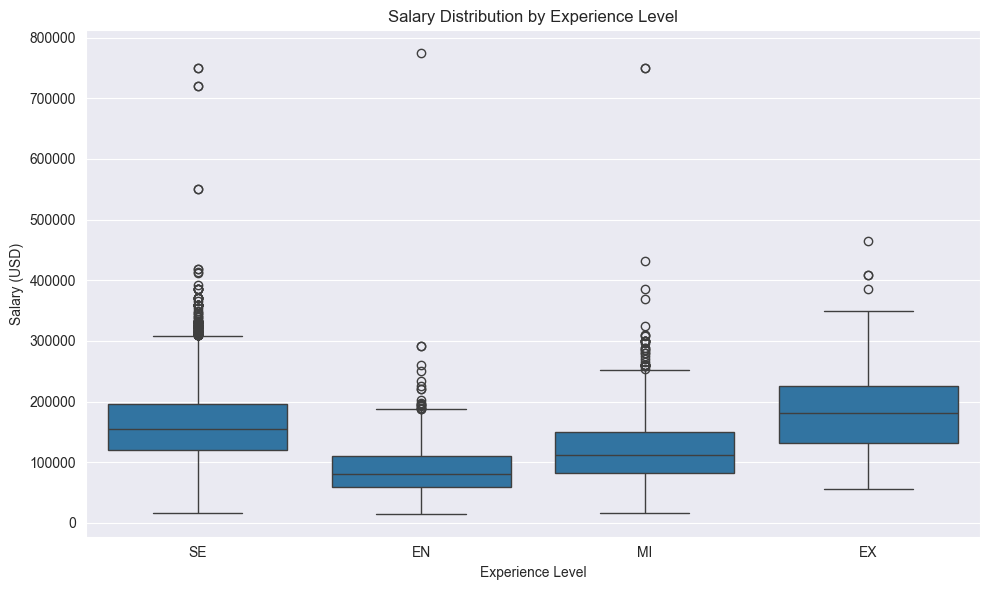

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

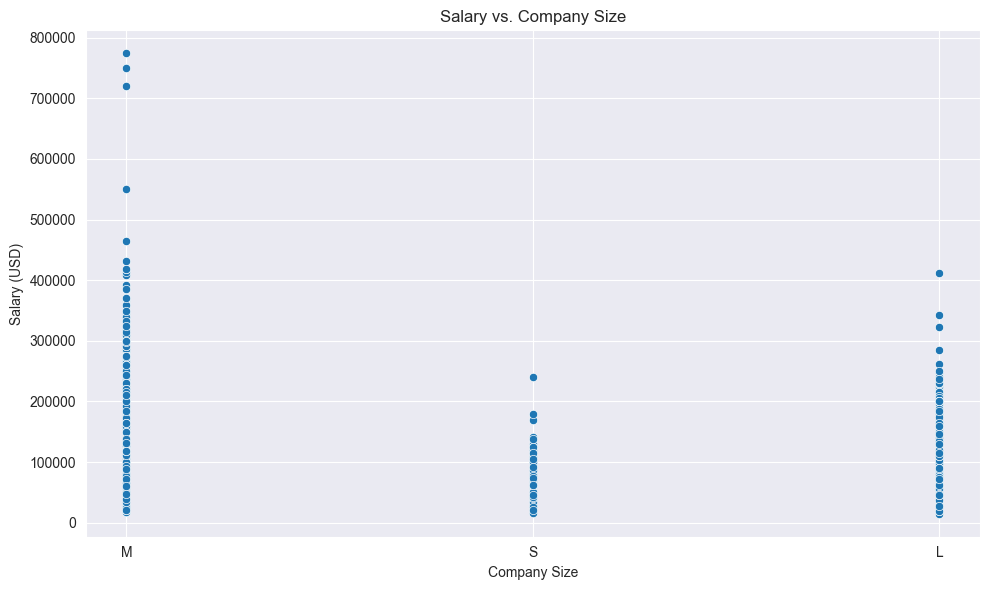

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='company_size', y='salary_in_usd', data=data)
plt.title('Salary vs. Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

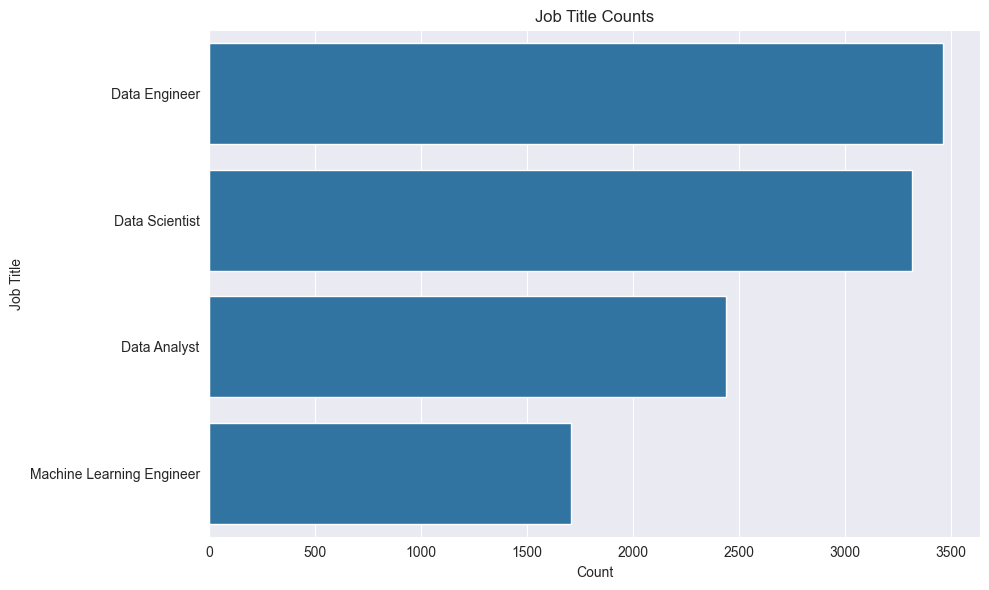

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(y='job_title', data=data, order=data['job_title'].value_counts().index)
plt.title('Job Title Counts')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

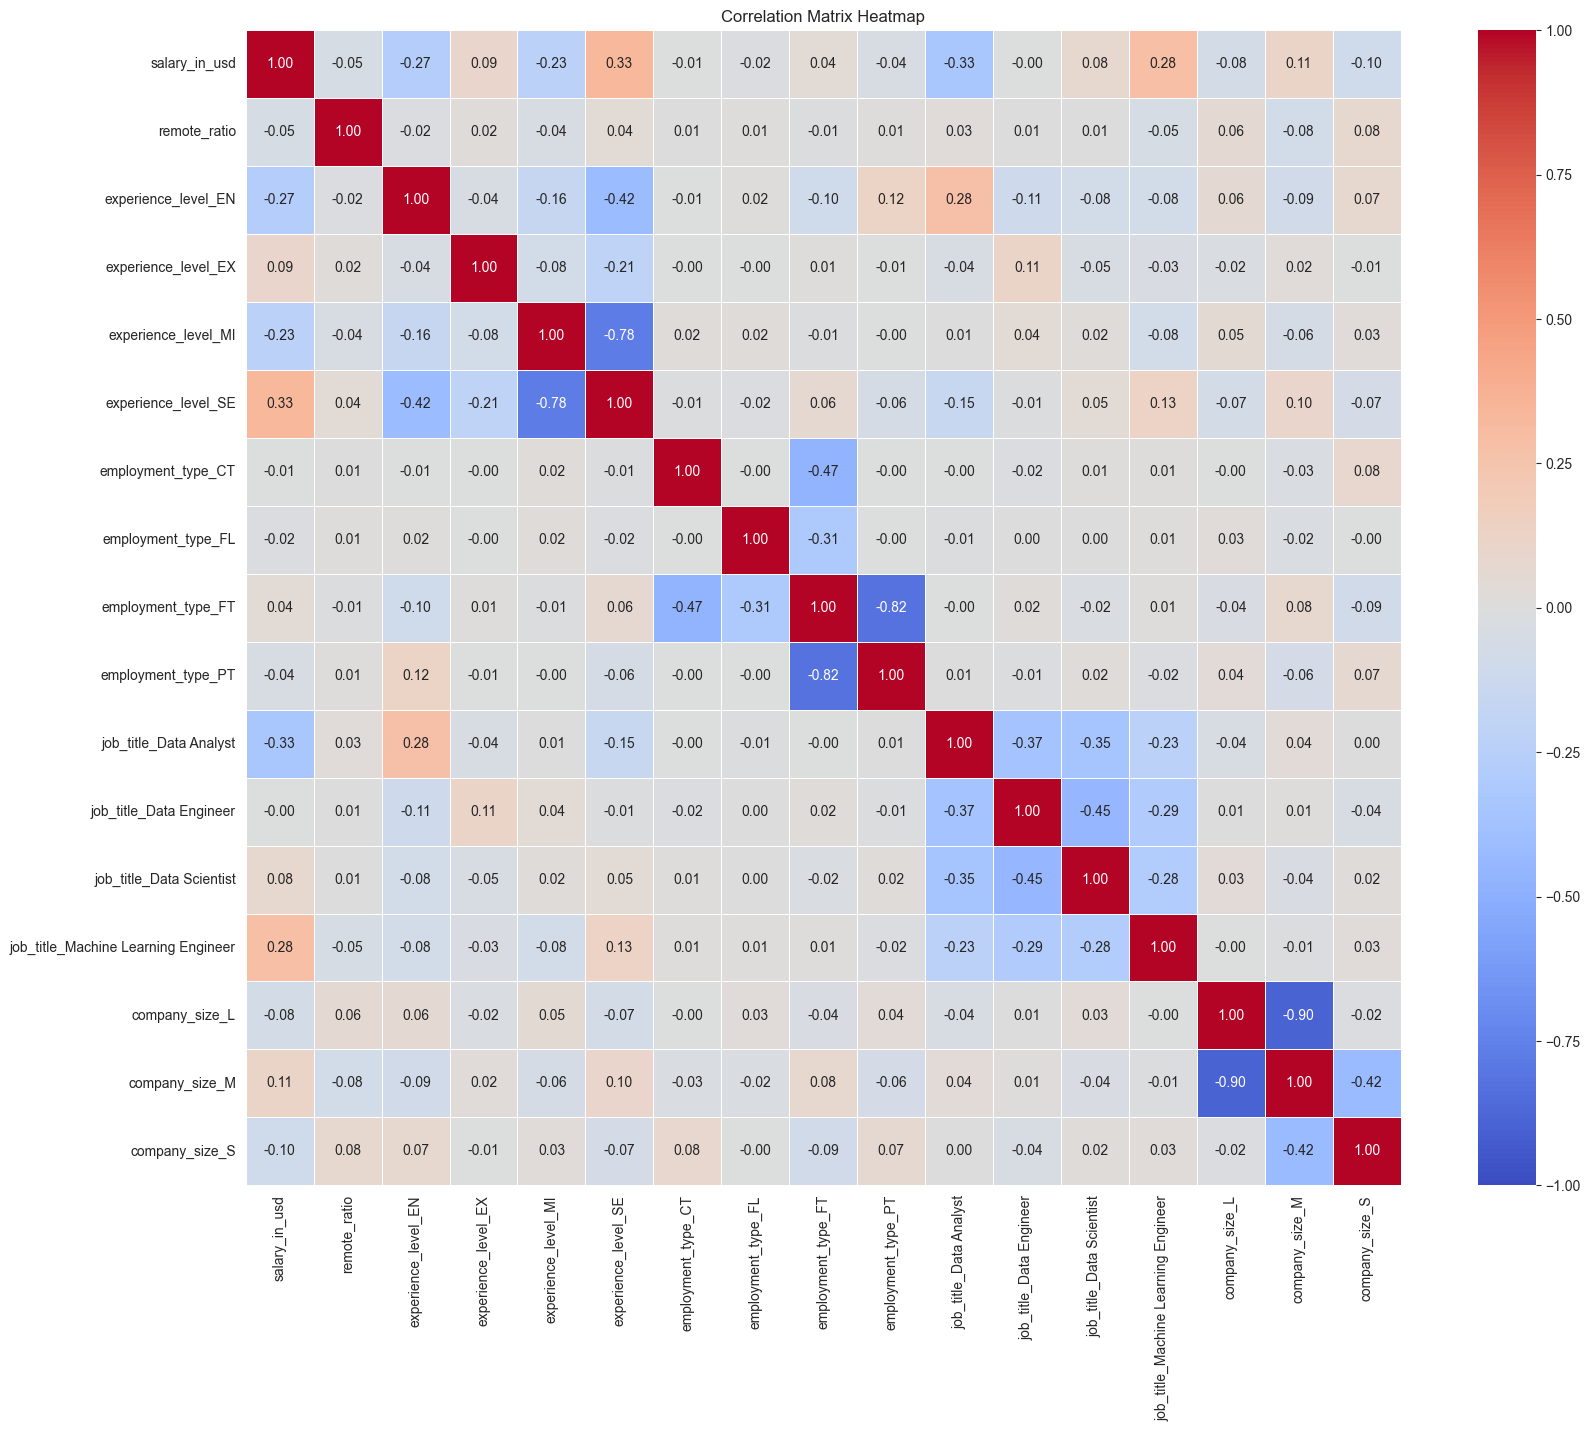

In [17]:
# Encode categorical variables
df_encoded = pd.get_dummies(data, columns=['experience_level', 'employment_type', 'job_title', 'company_size'])

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5,
            fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Observations

 ### The distribution of salaries shows a right skew, indicating most salaries are on the lower end, with fewer high salaries.
 ### The boxplot of salaries by job title reveals that Data Engineers and Machine Learning Engineers tend to have higher salaries compared to Data Analysts.
  ### Senior-level and Expert-level employees generally earn more compared to Entry-level employees.")
  ### The distribution of remote ratio shows that most jobs have a low remote ratio, indicating they are likely on-site roles.
  ### The correlation heatmap helps in identifying the relationships between different features and the target variable (salary_in_usd).

In [18]:
from sklearn.model_selection import train_test_split

# categorical features
categorical_features = ['experience_level', 'employment_type', 'job_title', 'company_size']
df = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)

# Get feature columns after encoding
feature_columns = df.columns.tolist()
# Remove the target variable 'salary_in_usd' from the list of feature columns
feature_columns.remove('salary_in_usd')

print("Feature Columns:")
print(feature_columns)

# Split the data into features and target variable
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Columns:
['remote_ratio', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT', 'job_title_Data Engineer', 'job_title_Data Scientist', 'job_title_Machine Learning Engineer', 'company_size_M', 'company_size_S']


In [19]:
from sklearn.tree import export_text, DecisionTreeRegressor

# Initialize and train the Decision Tree model
decisionTreeModel = DecisionTreeRegressor(random_state=42)
decisionTreeModel.fit(X_train, y_train)

# Extract rules from the Decision Tree
tree_rules = export_text(decisionTreeModel, feature_names=list(X.columns))
print(tree_rules)

|--- experience_level_SE <= 0.50
|   |--- experience_level_EX <= 0.50
|   |   |--- experience_level_MI <= 0.50
|   |   |   |--- company_size_M <= 0.50
|   |   |   |   |--- job_title_Machine Learning Engineer <= 0.50
|   |   |   |   |   |--- company_size_S <= 0.50
|   |   |   |   |   |   |--- employment_type_PT <= 0.50
|   |   |   |   |   |   |   |--- remote_ratio <= 75.00
|   |   |   |   |   |   |   |   |--- job_title_Data Scientist <= 0.50
|   |   |   |   |   |   |   |   |   |--- remote_ratio <= 25.00
|   |   |   |   |   |   |   |   |   |   |--- value: [36011.50]
|   |   |   |   |   |   |   |   |   |--- remote_ratio >  25.00
|   |   |   |   |   |   |   |   |   |   |--- job_title_Data Engineer <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [48007.00]
|   |   |   |   |   |   |   |   |   |   |--- job_title_Data Engineer >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [45390.00]
|   |   |   |   |   |   |   |   |--- job_title_Data Scientist >  0.50
|   |   

In [37]:
y_pred = decisionTreeModel.predict(X_test)

In [38]:
decisionTreeModel.score(X_train, y_train)

0.30050853549898826

In [39]:
decisionTreeModel.score(X_test, y_test)


0.23174757058256046

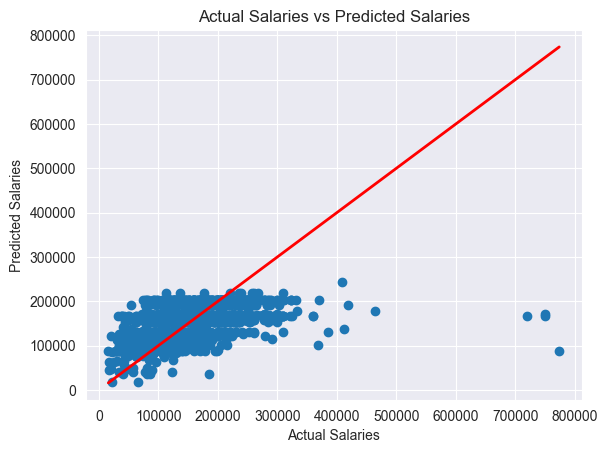

In [23]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual Salaries vs Predicted Salaries')
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

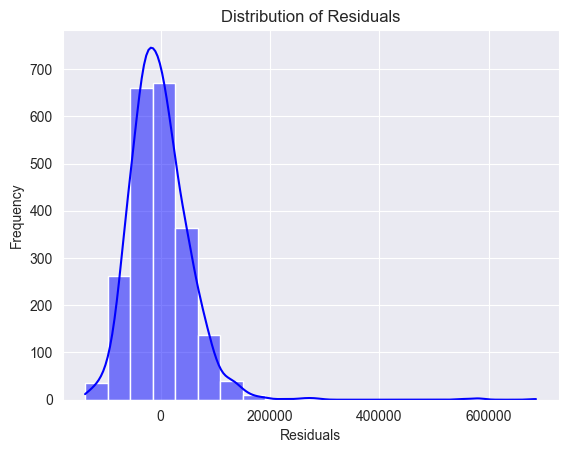

In [24]:
sns.histplot(y_test - y_pred , bins=20, kde=True, color='blue')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

In [36]:
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = decisionTreeModel.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 40807.51343108284
Mean Squared Error: 3278170655.2647705
R-squared: 0.23174757058256046


# USING ALTERNATIVE ALGORITHMS TO TRAIN THE MODEL

In [26]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

scoreTest = linear_regression.score(X_test, y_test)

print(scoreTest)


0.22680140163667506


In [35]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()

catboost.fit(X_train, y_train)

score = catboost.score(X_test, y_test)

print(score)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1, max_iter = 1000, tol = 0.0001, random_state = 42)

lasso.fit(X_train, y_train)

score = lasso.score(X_test, y_test)

print(score)

0.22679662712199666


In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1, max_iter = 1000, tol = 0.0001, random_state = 42)

ridge.fit(X_train, y_train)

score = ridge.score(X_test, y_test)

print(score)

0.2267817869418962


In [30]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)

xgb.fit(X_train, y_train)

score = xgb.score(X_test, y_test)

print(score)

0.23376721143722534


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42)

gbr.fit(X_train, y_train)

score = gbr.score(X_test, y_test)

print(score)

0.23793807917683307


In [34]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

random_forest.fit(X_train, y_train)

score = random_forest.score(X_test, y_test)

print(score)

0.23330798928865903


In [ ]:
# Save the models and feature columns
joblib.dump(random_forest, 'models/random_forest_model.pkl')
joblib.dump(decisionTreeModel, 'models/decision_tree_model.pkl')
joblib.dump(feature_columns, 'models/feature_columns.pkl')
joblib.dump(lasso, 'models/lasso_model.pkl')
joblib.dump(ridge, 'models/ridge_model.pkl')
joblib.dump(xgb, 'models/xgb_model.pkl')
joblib.dump(gbr, 'models/gbr_model.pkl')

In [29]:
def generate_prolog_rules(decision_tree):
    prolog_rules = ["% Define facts about the factors affecting salary\n"]

    # Extract unique values for each factor
    experience_levels = set()
    company_sizes = set()
    job_titles = set()
    employment_types = set()

    for rule in decision_tree:
        experience_levels.add(rule['ExperienceLevel'])
        company_sizes.add(rule['CompanySize'])
        job_titles.add(rule['JobTitle'])
        employment_types.add(rule['EmploymentType'])

    # Generate facts for each unique value
    for level in experience_levels:
        prolog_rules.append(f"experience_level('{level}').\n")
    for size in company_sizes:
        prolog_rules.append(f"company_size({size}).\n")
    for title in job_titles:
        prolog_rules.append(f"job_title('{title}').\n")
    for emp_type in employment_types:
        prolog_rules.append(f"employment_type('{emp_type}').\n")

    prolog_rules.append("\n")

    # Define a rule to predict salary based on factors
    prolog_rules.append("% Define a rule to predict salary based on factors\n")
    prolog_rules.append(
        "predict_salary(ExperienceLevel, CompanySize, JobTitle, RemoteRatio, EmploymentType, PredictedSalary) :-\n")

    # Generate decision tree rules
    for rule in decision_tree:
        experience_level = rule['ExperienceLevel']
        company_size = rule['CompanySize']
        job_title = rule['JobTitle']
        remote_ratio = rule['RemoteRatio']
        employment_type = rule['EmploymentType']
        predicted_salary = rule['PredictedSalary']

        prolog_rules.append("    % Decision tree rule\n")
        prolog_rules.append(f"    (   experience_level('{experience_level}'),\n")
        prolog_rules.append(f"        company_size({company_size}),\n")
        prolog_rules.append(f"        job_title('{job_title}'),\n")
        prolog_rules.append(f"        employment_type('{employment_type}')\n")
        prolog_rules.append("    ->\n")
        prolog_rules.append(f"        (   ExperienceLevel = '{experience_level}' ->\n")
        prolog_rules.append(f"            (   CompanySize = {company_size} ->\n")
        prolog_rules.append(f"                (   JobTitle = '{job_title}' ->\n")
        prolog_rules.append(f"                    (   RemoteRatio =< {remote_ratio} ->\n")
        prolog_rules.append(
            f"                            (   EmploymentType = '{employment_type}' -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(f"                            ;   true -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(f"                            )\n")
        prolog_rules.append(f"                    ;   RemoteRatio > {remote_ratio} ->\n")
        prolog_rules.append(
            f"                            (   JobTitle = '{job_title}' -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(
            f"                            ;   EmploymentType = '{employment_type}' -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(f"                            ;   true -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(f"                            )\n")
        prolog_rules.append(f"                    )\n")
        prolog_rules.append(f"                ;   CompanySize = {company_size} ->\n")
        prolog_rules.append(
            f"                        (   RemoteRatio =< {remote_ratio} -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(f"                        ;   true -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(f"                        )\n")
        prolog_rules.append(f"                ;   RemoteRatio > {remote_ratio} ->\n")
        prolog_rules.append(
            f"                        (   JobTitle = '{job_title}' -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(
            f"                        ;   EmploymentType = '{employment_type}' -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(f"                        ;   true -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(f"                        )\n")
        prolog_rules.append(f"                )\n")
        prolog_rules.append(f"            ;   ExperienceLevel = '{experience_level}' ->\n")
        prolog_rules.append(
            f"                    (   RemoteRatio =< {remote_ratio} -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(f"                    ;   true -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(f"                    )\n")
        prolog_rules.append(f"            ;   RemoteRatio > {remote_ratio} -> PredictedSalary is {predicted_salary}\n")
        prolog_rules.append(f"            )\n")
        prolog_rules.append("        ;\n")
        prolog_rules.append("            PredictedSalary is 0% Default salary if factors are not valid\n")
        prolog_rules.append("        ).\n")
        prolog_rules.append("\n")

    return prolog_rules


# Generate Prolog rules
prolog_code = generate_prolog_rules(tree_rules)

# Print the generated Prolog code
for line in prolog_code:
    print(line.strip())

# Write the generated Prolog code to a file
with open('test.pl', 'w') as file:
    for line in prolog_code:
        file.write(line)

print("Prolog rules have been written to kb.txt file.")

TypeError: string indices must be integers, not 'str'

In [28]:
from sklearn.tree import _tree
# Function to extract rules from the Decision Tree
def tree_to_prolog(model, feature_names):
    tree = model.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree.feature
    ]

    def recurse(node, depth):
        indent = "    " * depth
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree.threshold[node]
            print(f"{indent}if ({name} <= {threshold}) {{")
            recurse(tree.children_left[node], depth + 1)
            print(f"{indent}}} else {{")
            recurse(tree.children_right[node], depth + 1)
            print(f"{indent}}}")
        else:
            print(f"{indent}return {tree.value[node][0][0]}")

    recurse(0, 1)


# Extract and print rules in Prolog format
feature_names = X.columns
tree_to_prolog(decisionTreeModel, feature_names)

    if (experience_level_SE <= 0.5) {
        if (experience_level_EX <= 0.5) {
            if (experience_level_MI <= 0.5) {
                if (company_size_M <= 0.5) {
                    if (job_title_Machine Learning Engineer <= 0.5) {
                        if (company_size_S <= 0.5) {
                            if (employment_type_PT <= 0.5) {
                                if (remote_ratio <= 75.0) {
                                    if (job_title_Data Scientist <= 0.5) {
                                        if (remote_ratio <= 25.0) {
                                            return 36011.5
                                        } else {
                                            if (job_title_Data Engineer <= 0.5) {
                                                return 48007.0
                                            } else {
                                                return 45390.0
                                            }
                           

In [ ]:

def tree_to_prolog(model, feature_names):
    tree = model.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree.feature
    ]

    prolog_rules = []

    def recurse(node, depth):
        indent = "    " * depth
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree.threshold[node]
            prolog_rules.append(f"{indent}if ({name} <= {threshold}) {{")
            recurse(tree.children_left[node], depth + 1)
            prolog_rules.append(f"{indent}}} else {{")
            recurse(tree.children_right[node], depth + 1)
            prolog_rules.append(f"{indent}}}")
        else:
            prolog_rules.append(f"{indent}return {tree.value[node][0][0]}")

    recurse(0, 1)
    return prolog_rules


# Extract rules and convert them to Prolog
prolog_rules = tree_to_prolog(decisionTreeModel, feature_names)

# Write Prolog rules to a file
with open('docs/kb.txt', 'w') as f:
    for rule in prolog_rules:
        f.write(f"{rule}\n")

In [ ]:
from app import feature_columns
import matplotlib.pyplot as plt


def plot_feature_importance(model, feature_columns):
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({'feature': feature_columns, 'importance': importance})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Decision Tree Model')
    plt.gca().invert_yaxis()
    plt.show()


plot_feature_importance(decisionTreeModel, feature_columns)